In [43]:
import mysql.connector
import pandas as pd
import numpy as np 
from scipy import stats


In [44]:
db_config = {
    "host": "localhost",
    "user": "root",
    "password": "1377215Amir",
    "database": "laptop_analysis",
}

conn = mysql.connector.connect(**db_config)
mycursor = conn.cursor()

<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
درخواست 1</font>
</h1>


In [45]:
query = """
SELECT Branch 
from `order`
GROUP BY Branch 
"""

citys = pd.read_sql(query, conn)
citys['population']=['554406','3001000','529673','1559000','1961000','8694000','1185000','520944','39853','679995','1592000','946651','1566000','736224','430871','309820']
citys['population'] = pd.to_numeric(citys['population'], errors='coerce')
citys

C:\Users\amirs\AppData\Local\Temp\ipykernel_12000\3846525396.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  citys = pd.read_sql(query, conn)


,Branch,population
0,Hamedan,554406
1,Mashhad,3001000
2,Yazd,529673
3,Tabriz,1559000
4,Isfahan,1961000
5,Tehran,8694000
6,Ahvaz,1185000
7,Arak,520944
8,Kish,39853
9,Rasht,679995


In [46]:
query = """
SELECT Branch, COUNT(Order_id) AS Total_Orders , SUM(Profit) AS Total_Profit
FROM `order`
GROUP BY Branch;
"""

result_df = pd.read_sql(query, conn)
result_df

C:\Users\amirs\AppData\Local\Temp\ipykernel_12000\2960066020.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_df = pd.read_sql(query, conn)


,Branch,Total_Orders,Total_Profit
0,Hamedan,50984,7.330414e+10
1,Mashhad,101684,1.462420e+11
2,Yazd,50762,7.318082e+10
3,Tabriz,50795,7.306552e+10
4,Isfahan,101698,1.467461e+11
5,Tehran,152533,2.196613e+11
6,Ahvaz,50793,7.317988e+10
7,Arak,50915,7.332237e+10
8,Kish,50747,7.343086e+10
9,Rasht,50851,7.378030e+10


In [47]:
result_df ['population'] = citys['population']
result_df

,Branch,Total_Orders,Total_Profit,population
0,Hamedan,50984,7.330414e+10,554406
1,Mashhad,101684,1.462420e+11,3001000
2,Yazd,50762,7.318082e+10,529673
3,Tabriz,50795,7.306552e+10,1559000
4,Isfahan,101698,1.467461e+11,1961000
5,Tehran,152533,2.196613e+11,8694000
6,Ahvaz,50793,7.317988e+10,1185000
7,Arak,50915,7.332237e+10,520944
8,Kish,50747,7.343086e+10,39853
9,Rasht,50851,7.378030e+10,679995


In [48]:
#Scaling
result_df['Total_Orders'] = (result_df['Total_Orders'] - result_df['Total_Orders'].min()) / (result_df['Total_Orders'].max() - result_df['Total_Orders'].min())
result_df['Total_Profit'] = (result_df['Total_Profit'] - result_df['Total_Profit'].min()) / (result_df['Total_Profit'].max() - result_df['Total_Profit'].min())
result_df['population'] = (result_df['population'] - result_df['population'].min()) / (result_df['population'].max() - result_df['population'].min())
result_df

,Branch,Total_Orders,Total_Profit,population
0,Hamedan,0.003024,0.001628,0.059457
1,Mashhad,0.500781,0.499172,0.342165
2,Yazd,0.000844,0.000787,0.056599
3,Tabriz,0.001168,0.000000,0.175540
4,Isfahan,0.500918,0.502610,0.221991
5,Tehran,1.000000,1.000000,1.000000
6,Ahvaz,0.001149,0.000780,0.132323
7,Arak,0.002346,0.001752,0.055591
8,Kish,0.000697,0.002492,0.000000
9,Rasht,0.001718,0.004876,0.073969


In [49]:

result_df['Measurement criteria'] = 0.5*(result_df['Total_Orders']/citys['population']) + 0.5*(result_df['Total_Profit']/citys['population'])
result_df = result_df.sort_values(['Measurement criteria'], ascending=False)

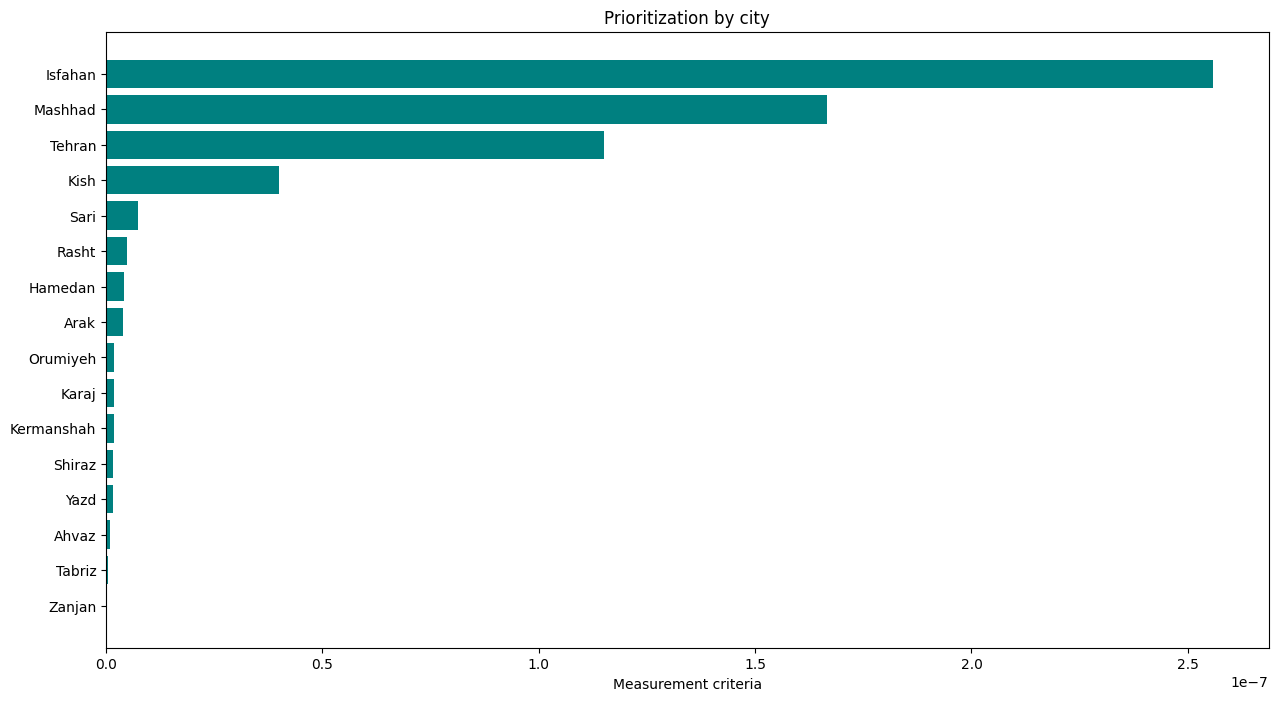

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plt.barh(result_df['Branch'], result_df['Measurement criteria'], color='teal')
plt.xlabel('Measurement criteria')
plt.title('Prioritization by city')
plt.gca().invert_yaxis() 
plt.show()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این درخواست از ما خواسته شده است که مناسب‌ترین شهر ها را برای تبلیغات معرفی کنیم. امر تبلیغات هزینه‌های زیادی در بر دارد بنابراین باید این شهر ها به نحوی انتخاب  شوند که بهترین آورده را برا شرکت داشته باشند و به لحاظ اقتصادی ارزش هزینه‌ای که شرکت می‌کند را داشته باشند. به این منظور ما یک معیار معرفی کرده‌ایم که در آن هم تعداد سفارشات هر شهر و همچنین سود حاصل از هر شهر در نظر گرفته می‌شود. برای آنکه ما بتوانیم معیاری قابل مقایسه داشته باشیم از جمعیت شهر ها هم استفاده کرده‌ایم و تعداد سفارشات هر شهر و همچنین سود حاصله از هر شهر را بر جمعیت تقسیم کرده‌ایم.
بااین معیار شهرهایی برای تبلیغات در اولویت قرار میگیرند که هم در گذشته فروش بیشتری نسبت به جمعیت خود داشته‌اند و هم اینکه سود خوبی را عاید شرکت کرده‌اند.
در واقع ما به دنبال افزایش تعداد مشتریان هستیم و شاید به نظر برسد که معیار تعداد فروش هر شهر  تقسیم بر جمعیت شهر به تنهایی کافی باشد اما مسئله اینجاست که ما باید این را هم در نظر بگیریم که مشتریانی که به ما اضافه میشوند چه سودی را حاصل شرکت میکنند بنابراین معیار تعداد فروش بر جمعیت به تنهایی کافی نیست. پس ما از معیاری ترکیبی استفاده ‌می‌کنیم و ما با این معیار ترکیبی شهرهایی را در اولویت قرار می دهیم که با انجام تبلیغات مشتریان بیشتری را برای شرکت به همراه بیاورند و همچنین این مشتریان سود نسبتا بهتری را عاید شرکت کنند. معیار ترکیبی ما به شکل زیر است:

Measurement criteria = 0.5 * (Total_Orders / population) + 0.5 * (Total_Profit / population)

</p>

<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
درخواست 2</font>
</h1>


In [63]:
query = """SELECT Order_Date,Discount,SUM(Quantity),COUNT(Order_Date),AVG(Quantity) FROM `order` GROUP BY Order_Date,Discount"""
result_df = pd.read_sql(query, conn)
result_df


C:\Users\amirs\AppData\Local\Temp\ipykernel_12000\574244282.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_df = pd.read_sql(query, conn)


,Order_Date,Discount,SUM(Quantity),COUNT(Order_Date),AVG(Quantity)
0,1390-09-06,0,222.0,193,1.1503
1,1390-09-06,2,12.0,12,1.0000
2,1390-09-06,3,9.0,9,1.0000
3,1390-09-06,5,9.0,8,1.1250
4,1390-09-06,7,3.0,3,1.0000
...,...,...,...,...,...
25565,1402-07-19,2,11.0,11,1.0000
25566,1402-07-19,3,10.0,8,1.2500
25567,1402-07-19,5,4.0,4,1.0000
25568,1402-07-19,7,4.0,4,1.0000


In [65]:
discounted_sales = result_df[result_df['Discount'] > 0].groupby(['Order_Date']).mean(['AVG(Quantity)'])
discounted_sales = discounted_sales ['AVG(Quantity)']
non_discounted_sales = result_df[result_df['Discount'] == 0]
non_discounted_sales = non_discounted_sales['AVG(Quantity)']
discounted_sales

Order_Date
1390-09-06    1.025000
1390-09-07    1.066660
1390-09-08    1.125240
1390-09-09    1.227140
1390-09-10    1.127975
                ...   
1402-07-15    1.042220
1402-07-16    1.200000
1402-07-17    1.088880
1402-07-18    1.106660
1402-07-19    1.050000
Name: AVG(Quantity), Length: 4337, dtype: float64

In [53]:
t_statistic, p_value = stats.ttest_rel(discounted_sales, non_discounted_sales)

print(f"آمار تست T: {t_statistic}")
print(f"مقدار p-value: {p_value}")

آمار تست T: -1.1206634028110374
مقدار p-value: 0.26249323041826744


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این درخواست از ما خواسته شده است تا بررسی کنیم که آیا تخفیفی که شرکت اعمال 
می‌کند بر روی میزان فروش تاثیر دارد یا نه؟
 به این منظور ما به بررسی تاثیر تخفیف بر روی میانگین روزانه تعداد کالا در هر سبد 
 خرید می‌پردازیم. با این بررسی مشخص خواهد شد که آیا تخفیف هایی که اعمال شده است تاثیری بر تعداد کالای موجود در هر سفارش خواهد داشت یا نه؟ پس ما دو دسته داده داریم (روزهایی که تخفیف داشته ایم و روز هایی که تخفیف نداشته ایم) پس از جدا سازی داده ها ما برای مقایسه میانگین این دو دسته داده از تی تست وابسته استفاده کرده‌ایم که نتیجه این تست به ما می‌گوید چون که مقدار P_value از 0.05 بیشتر است بنابراین تفاوت معناداری به لحاظ آماری میان میانگین دو دسته داده نیست و میتوان نتیجه گرفت که تخفیف های شرکت تاثیر معناداری بر روی تعداد کالا در سفارش‌ها نداشته است. با تکرار این تست روی میزان  فروش هر کالا(قیمت)،  تعداد فروش روزانه هر مدل و ... نیز همین نتیجه تکرار شد.
 در رابطه با علل این موضوع با بررسی بیشتر داده‌ها مشخص شد که شرکت در تمامی بازه مورد بررسی همواره تخفیف داشته است و این تخفیف ها به صورت هدفمندی در روز ها و مناسبت های خاص اعمال نشده است و همچنین تمامی کالا ها در این بازه دارای تخفیف بوده‌اند و برخی کالا های خاص برای تخفیف دادن انتخاب نشده اند. این نتایج بدست آمده از بررسی ها نتیجه تی تست ما را تایید می‌کنند.</p>